# Estudo de caso em Python

O estudo de caso mostra uma análise simples de dados abertos do Instituto Nacional do Seguro Social (INSS) relativos aos benefícios concedidos em maio de 2023. Os dados estão disponíveis publicamente no Portal de Dados Abertos (https://dados.gov.br/) em três formatos: CSV, XML e JSON.

O código abaixo mostra o exemplo de carregamento dos dados com Pandas do arquivo de entrada. Usamos opções adicionais devido ao formato da planilha: ``sep`` para usar o separador ``;`` das colunas, ``encoding`` para definir a codificação de caracteres como acentos. A saída do código mostra as colunas lidas de um total de 508 mil linhas.

In [98]:
inss_maio_2023 = pd.read_csv('D.SDA.PDA.001.CON.202305.csv',
                    sep=';', encoding='latin_1')

inss_maio_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508583 entries, 0 to 508582
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Competência concessão  508583 non-null  int64 
 1   Espécie                508583 non-null  object
 2   CID                    508583 non-null  object
 3   Despacho               508583 non-null  object
 4   Dt Nascimento          508583 non-null  object
 5   Sexo.                  508583 non-null  object
 6   Clientela              508583 non-null  object
 7   Tipo de Cálculo        508583 non-null  object
 8   Mun Resid              508583 non-null  object
 9   Vínculo dependentes    508583 non-null  object
 10  Forma Filiação         508583 non-null  object
 11  UF                     508583 non-null  object
 12  Qt SM RMI              508583 non-null  object
dtypes: int64(1), object(12)
memory usage: 50.4+ MB


Nosso primeiro exemplo é a análise de pedidos de auxílio doença entre as áreas urbanas e rural abaixo. A informação sobre áreas está na coluna ``Clientela``. Primeiro, selecionamos todas as linhas que possuem ``Doenca`` na coluna ‘Espécie’ na linha 1 e o resultado é salvo no DataFrame ``inss_doenca``. Na linha 2 agrupamos os dados pela coluna ``Clientela`` com a função ``groupby`` e contamos as ocorrências de cada valor com ``count()``. 

In [99]:
inss_doenca = inss_maio_2023[inss_maio_2023['Espécie'].str.contains('Doenca')]
inss_doenca.groupby(['Clientela'])['Clientela'].count()

Clientela
Rural        14767
Urbano      183614
Name: Clientela, dtype: int64

O código mostra a segunda análise sobre a idade dos beneficiários baseada na data de nascimento. Para tanto, precisamos usar a coluna ``Dt Nascimento`` para converter de string para data e calcular a idade com relação a data atual. A linha 8 usa a função ``apply()`` que irá aplicar a função ``calcula_idade`` em todas as linhas da coluna ``Dt Nascimento`` e armazena os resultados em uma nova coluna ``Idade``.

<Axes: ylabel='Frequency'>

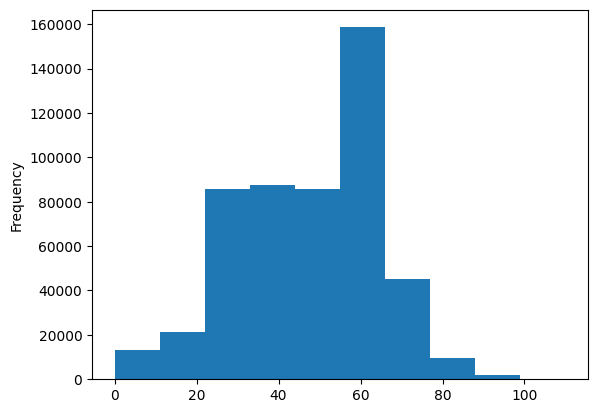

In [100]:
from datetime import datetime, date

def calcula_idade( nascimento ):
    nascimento = datetime.strptime(nascimento, '%d/%m/%Y').date()
    hoje = date.today()
    return hoje.year - nascimento.year - (hoje.month < nascimento.month)

inss_maio_2023['Idade'] = inss_maio_2023['Dt Nascimento'].apply( calcula_idade )
inss_maio_2023['Idade'].plot.hist()

In [97]:
#inss_maio_2023['Qt SM RMI'] = inss_maio_2023['Qt SM RMI'].str.replace(',', '.').astype(float)
#inss_maio_2023[inss_maio_2023['Qt SM RMI'] > 1.0].head()
inss_maio_2023.sort_values(by='Qt SM RMI', ascending=False).head()

,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,Idade
198084,202305,Pensão por Morte de Anistiados,Zerados,Concessao Normal,06/04/1949,Feminino,Urbano,Rmi Informada/Salario Mi,21486-SP-Santos,Cônjuge,Empregado,São Paulo,46.446,74
411371,202305,Auxílio Salario Maternidade,Zerados,Concessao Normal,01/11/1966,Feminino,Urbano,Calculo na Dib sem Fator,23001-DF-Brasília,Filho Adotivo,Empregado,Distrito Federal,20.464,56
401956,202305,Auxílio Salario Maternidade,Zerados,Concessao Normal,10/03/1979,Masculino,Urbano,Calculo na Dib sem Fator,21523-SP-Sorocaba,Filho Adotivo,Empregado,São Paulo,18.468,44
189436,202305,Pensão por Morte Acidente do Trabalho,Zerados,Concessao Normal,05/11/1974,Feminino,Urbano,Rmi Informada/Salario Mi,21096-SP-Campinas,Filho,Empregado,São Paulo,14.570,48
182534,202305,Auxílio Salario Maternidade,Zerados,Concessao Normal,12/11/1977,Feminino,Urbano,Calculo na Dib sem Fator,21504-SP-São Paulo,Filho Adotivo,Empregado,São Paulo,13.098,45
